## Psi Chi R - July 2025

https://osf.io/wxmzk/wiki/home/

Level 1: Preparing the data

• Remove participants who are missing ‘Age’ and ‘BPM’

Level 2: Data inspection

• Identify participants with values considered outliers for ‘BPM’.

a. Test your skills: Visualize outlier values for ‘BPM’.

• Is BPM skewed? If so, how?

• Identify participants with values considered outliers for ‘hourslistened’

• Remove participants with values considered outliers on ‘BPM’ and ‘hourslistened’

Level 2: Descriptives

• Find the mean, standard deviation, median, and range of ‘hourslistened’

a. Test your skills: Find the mean, standard deviation, median, and range of ‘hourslistened’ in one step.

Level 3: Inferential + Other Statistics

• Is there a statistically significant correlation between the number of hours someone listened to EDM and their depression score?

• Is there a significant relationship between the frequency of listening to metal music and the mental health effects of listening to music?

Test your skills: Is there a statistically significant difference in anxiety scores between people who listen to Jazz ‘very frequently’ and ‘never?’

Test your skills: Is there a statistically significant difference in Insomnia scores between people whose favorite genre is “pop” and people whose favorite genre is “rap?”

Level 4: Visualization

• Graph the relationship between the number of hours someone listens to music and their OCD score

## Load packages

In [ ]:
#rm(list=ls())

[1] 0.9214092

In [1]:

## sum rows
sum_rows = function(x) {
  x = as.data.frame(x)
  sums = sapply(x,function(col) if (is.numeric(col)) sum(col, na.rm = T) else NA)
  sums = as.data.frame(t(sums))
  names(sums) = names(x)
  rbind(x, sums)
}

## right column for total
sum_cols = function(x) {
  x$Total = rowSums(x[sapply(x, is.numeric)], na.rm = T)
  x
}

#dollar format function
dollars = function(x) {
  paste0("$",format(x,big.mark= ",",scientific=F))
}

desc_stats = function(x){
  c(min = min(x,na.rm=T),
    median = median(x,na.rm=T),
    max = max(x,na.rm=T),
    mean = mean(x,na.rm=T),
    sd = sd(x,na.rm=T))
}

#numeric notations
options(scipen=9999)

library(tidyverse)
library(readxl)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
sheet_URL = "https://osf.io/download/edn8q/"

download.file(sheet_URL, destfile = "data.csv")

data = read.csv("data.csv")

In [3]:
data |> head()

,Timestamp,Age,Primary.streaming.service,hourslistened,While.working,Instrumentalist,Composer,Fav.genre,Exploratory,Foreign.languages,⋯,Frequency..Pop.,Frequency..R.B.,Frequency..Rap.,Frequency..Rock.,Frequency..Video.game.music.,Anxiety,Depression,Insomnia,OCD,Music.effects
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,8/27/2022 19:29,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,⋯,Very frequently,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,
2,8/27/2022 19:57,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,⋯,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,
3,8/27/2022 21:28,18,Spotify,4.0,No,No,No,Video game music,No,Yes,⋯,Rarely,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect
4,8/27/2022 21:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,⋯,Sometimes,Sometimes,Never,Never,Never,9,7,3,3,Improve
5,8/27/2022 21:54,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,⋯,Sometimes,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve
6,8/27/2022 21:56,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,⋯,Very frequently,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve


## Clean and join

In [4]:
names(data) = trimws(str_to_lower(str_replace_all(names(data), " ", "_")))

In [5]:
str(data)

'data.frame':	736 obs. of  32 variables:
 $ timestamp                   : chr  "8/27/2022 19:29" "8/27/2022 19:57" "8/27/2022 21:28" "8/27/2022 21:40" ...
 $ age                         : int  18 63 18 61 18 18 18 21 19 18 ...
 $ primary.streaming.service   : chr  "Spotify" "Pandora" "Spotify" "YouTube Music" ...
 $ hourslistened               : num  3 1.5 4 2.5 4 5 3 1 6 1 ...
 $ while.working               : chr  "Yes" "Yes" "No" "Yes" ...
 $ instrumentalist             : chr  "Yes" "No" "No" "No" ...
 $ composer                    : chr  "Yes" "No" "No" "Yes" ...
 $ fav.genre                   : chr  "Latin" "Rock" "Video game music" "Jazz" ...
 $ exploratory                 : chr  "Yes" "Yes" "No" "Yes" ...
 $ foreign.languages           : chr  "Yes" "No" "Yes" "Yes" ...
 $ bpm                         : int  156 119 132 84 107 86 66 95 94 155 ...
 $ frequency..classical.       : chr  "Rarely" "Sometimes" "Never" "Sometimes" ...
 $ frequency..country.         : chr  "Never" "Never" 

## Level 1: Preparing the data
Remove participants who are missing ‘Age’ and ‘BPM’

In [6]:
data1=data |> filter(!is.na(age) & !is.na(bpm))

str(data1)

'data.frame':	629 obs. of  32 variables:
 $ timestamp                   : chr  "8/27/2022 19:29" "8/27/2022 19:57" "8/27/2022 21:28" "8/27/2022 21:40" ...
 $ age                         : int  18 63 18 61 18 18 18 21 19 18 ...
 $ primary.streaming.service   : chr  "Spotify" "Pandora" "Spotify" "YouTube Music" ...
 $ hourslistened               : num  3 1.5 4 2.5 4 5 3 1 6 1 ...
 $ while.working               : chr  "Yes" "Yes" "No" "Yes" ...
 $ instrumentalist             : chr  "Yes" "No" "No" "No" ...
 $ composer                    : chr  "Yes" "No" "No" "Yes" ...
 $ fav.genre                   : chr  "Latin" "Rock" "Video game music" "Jazz" ...
 $ exploratory                 : chr  "Yes" "Yes" "No" "Yes" ...
 $ foreign.languages           : chr  "Yes" "No" "Yes" "Yes" ...
 $ bpm                         : int  156 119 132 84 107 86 66 95 94 155 ...
 $ frequency..classical.       : chr  "Rarely" "Sometimes" "Never" "Sometimes" ...
 $ frequency..country.         : chr  "Never" "Never" 

## Level 2: Data inspection

• Identify participants with values considered outliers for ‘BPM’.

a. Test your skills: Visualize outlier values for ‘BPM’.

• Is BPM skewed? If so, how?

• Identify participants with values considered outliers for ‘hourslistened’

• Remove participants with values considered outliers on ‘BPM’ and ‘hourslistened’

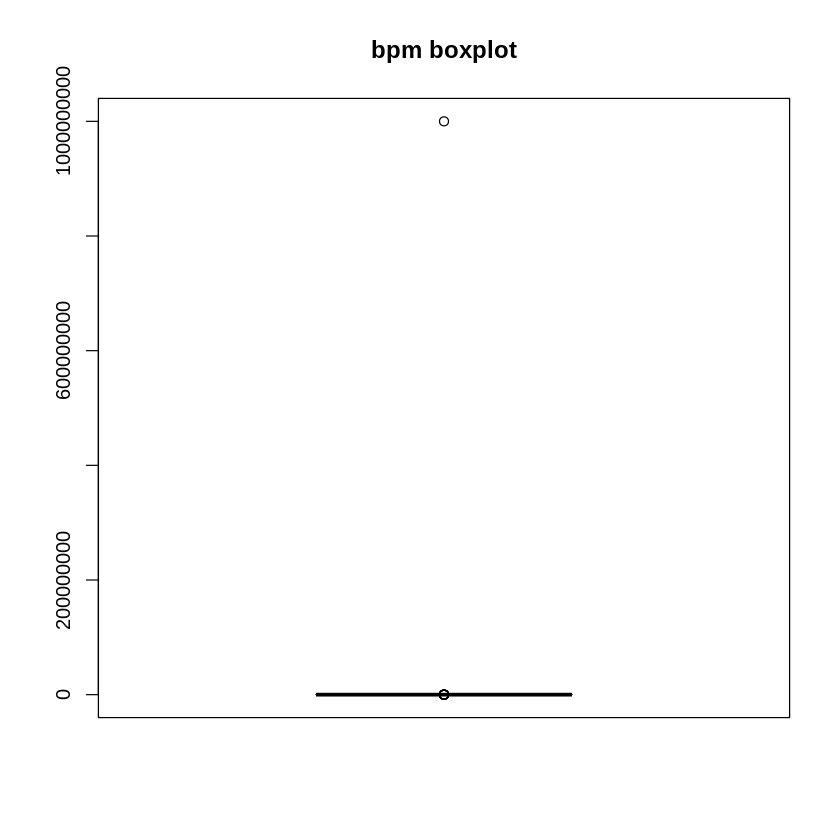

In [8]:
data1$bpm2 = as.numeric(data1$bpm)

boxplot(data1$bpm2)
title('bpm boxplot')

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     52     100     120     122     140     194 

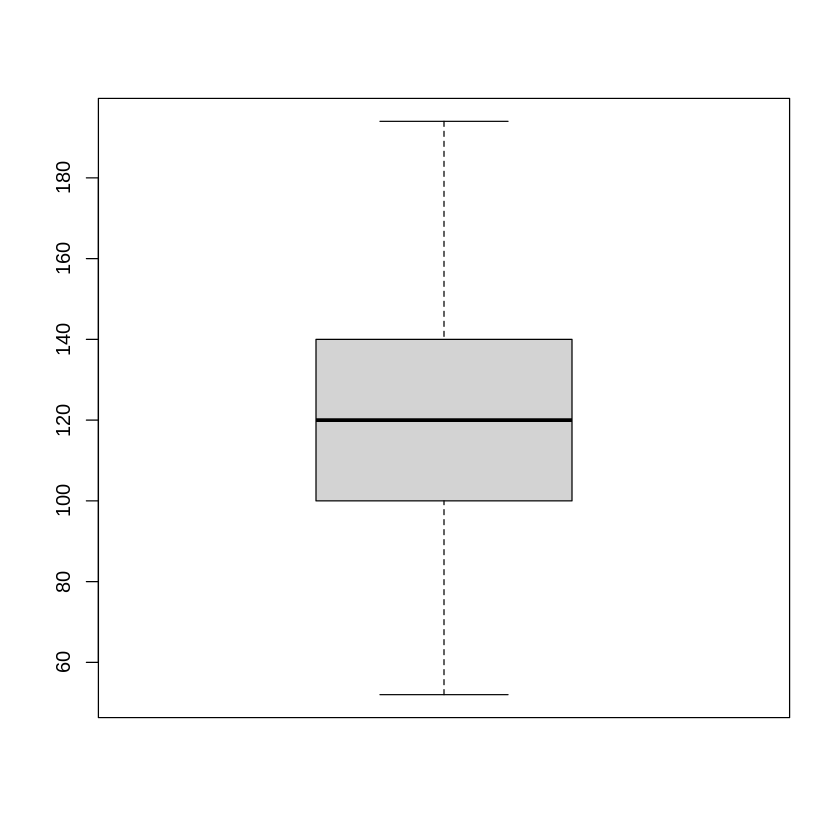

In [9]:
data2 = data1 |> filter(bpm < 200 & bpm > 40)

boxplot(data2$bpm)
summary(data2$bpm)

## Level 2: Descriptives

• Find the mean, standard deviation, median, and range of ‘hourslistened’

a. Test your skills: Find the mean, standard deviation, median, and range of ‘hourslistened’ in one step.

In [10]:
print(desc_stats(data2$hourslistened))

#range: 0 to 24

      min    median       max      mean        sd 
 0.000000  3.000000 24.000000  3.726403  3.108148 


## Level 3: Inferential + Other Statistics

• Is there a statistically significant correlation between the number of hours someone listened to EDM and their depression score?

• Is there a significant relationship between the frequency of listening to metal music and the mental health effects of listening to music?

Test your skills: Is there a statistically significant difference in anxiety scores between people who listen to Jazz ‘very frequently’ and ‘never?’

Test your skills: Is there a statistically significant difference in Insomnia scores between people whose favorite genre is “pop” and people whose favorite genre is “rap?”

### • Is there a statistically significant correlation between the number of hours someone listened to EDM and their depression score?

In [ ]:
head(data2)

,timestamp,age,primary.streaming.service,hourslistened,while.working,instrumentalist,composer,fav.genre,exploratory,foreign.languages,⋯,frequency..r.b.,frequency..rap.,frequency..rock.,frequency..video.game.music.,anxiety,depression,insomnia,ocd,music.effects,bpm2
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,8/27/2022 19:29,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,⋯,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,,156
2,8/27/2022 19:57,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,⋯,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,,119
3,8/27/2022 21:28,18,Spotify,4.0,No,No,No,Video game music,No,Yes,⋯,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect,132
4,8/27/2022 21:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,⋯,Sometimes,Never,Never,Never,9,7,3,3,Improve,84
5,8/27/2022 21:54,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,⋯,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve,107
6,8/27/2022 21:56,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,⋯,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve,86


In [ ]:
list_1 = c('hourslistened','depression')

data3 = data2 |>
  filter(str_detect(fav.genre,"EDM"))

head(data3)

,timestamp,age,primary.streaming.service,hourslistened,while.working,instrumentalist,composer,fav.genre,exploratory,foreign.languages,⋯,frequency..r.b.,frequency..rap.,frequency..rock.,frequency..video.game.music.,anxiety,depression,insomnia,ocd,music.effects,bpm2
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,8/27/2022 23:00,19,YouTube Music,8,Yes,No,No,EDM,Yes,No,⋯,Rarely,Sometimes,Rarely,Rarely,1,0,0,1,Improve,125
2,8/28/2022 11:39,20,Spotify,4,Yes,No,No,EDM,Yes,No,⋯,Very frequently,Sometimes,Very frequently,Rarely,7,2,8,6,Improve,161
3,8/28/2022 12:37,17,Apple Music,2,Yes,Yes,No,EDM,Yes,No,⋯,Sometimes,Sometimes,Very frequently,Rarely,0,0,0,0,Improve,128
4,8/28/2022 14:10,18,YouTube Music,2,No,No,No,EDM,No,Yes,⋯,Rarely,Sometimes,Rarely,Very frequently,9,0,5,10,Improve,150
5,8/28/2022 15:02,20,Spotify,3,No,No,Yes,EDM,Yes,Yes,⋯,Never,Sometimes,Sometimes,Rarely,0,3,7,0,Improve,121
6,8/28/2022 16:32,22,Spotify,1,No,No,Yes,EDM,Yes,No,⋯,Very frequently,Sometimes,Sometimes,Never,2,7,5,0,Improve,128


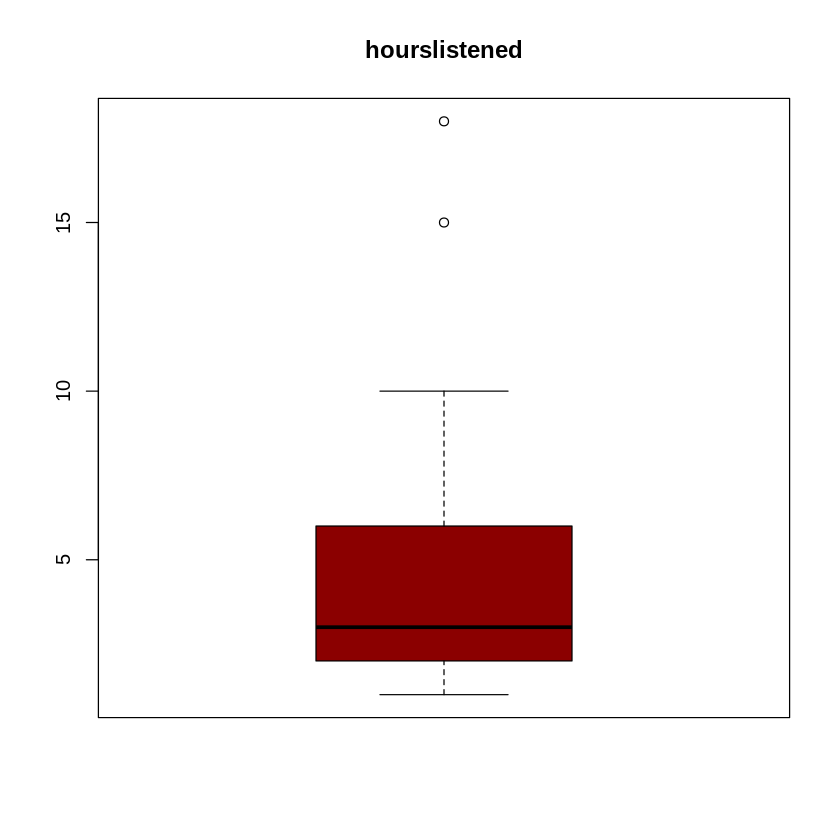

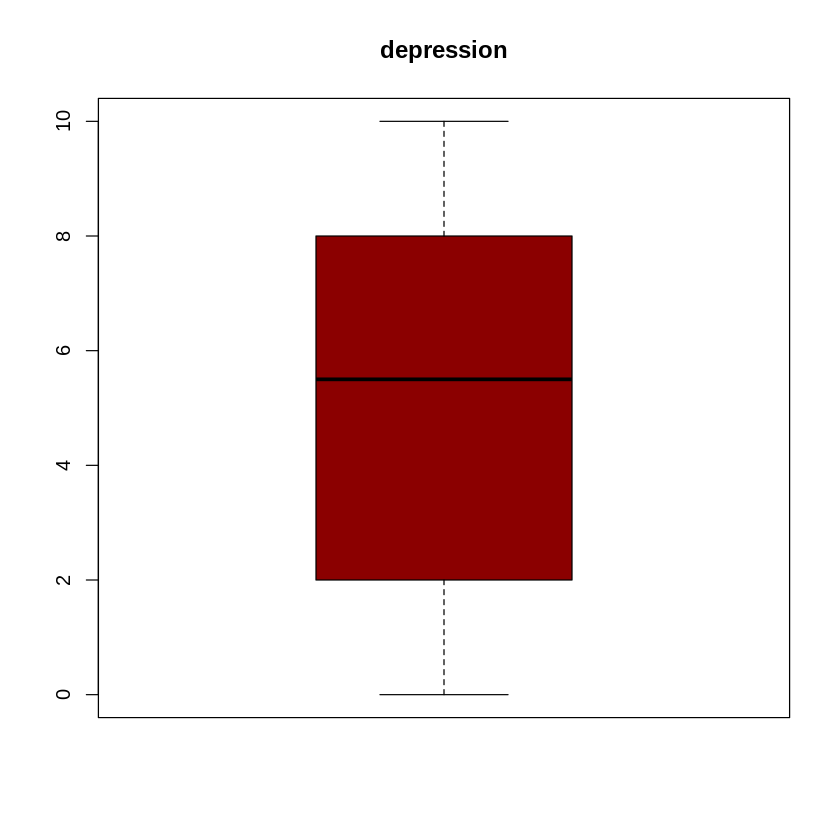

In [ ]:
for (i in list_1){
  x = boxplot(data3[i],col='darkred')
title(i)
}

data4 = data3 |> filter(hourslistened < 15)

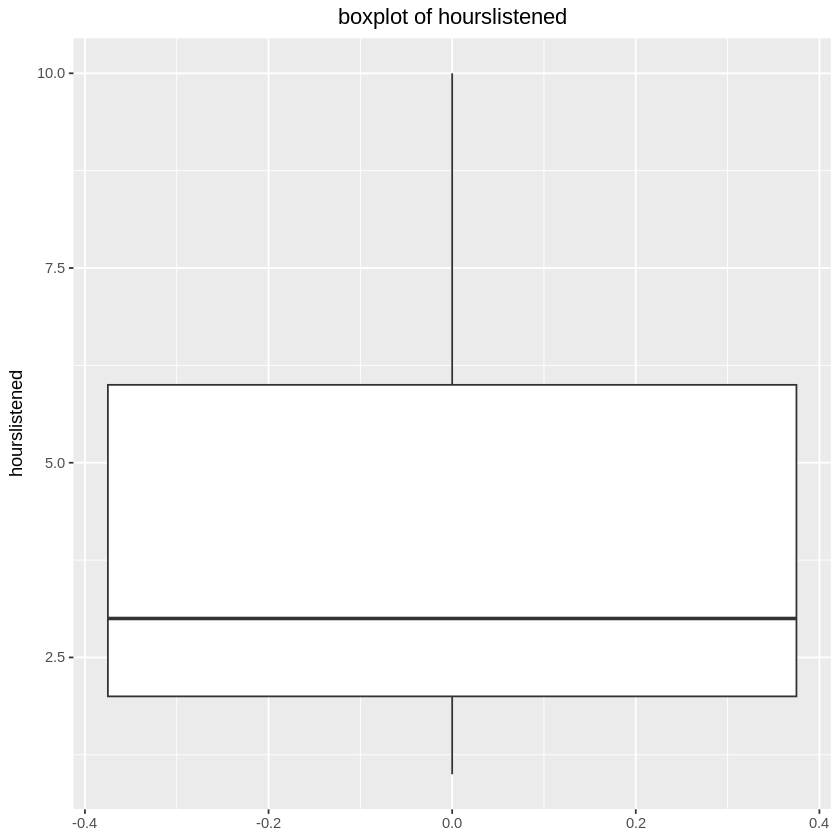

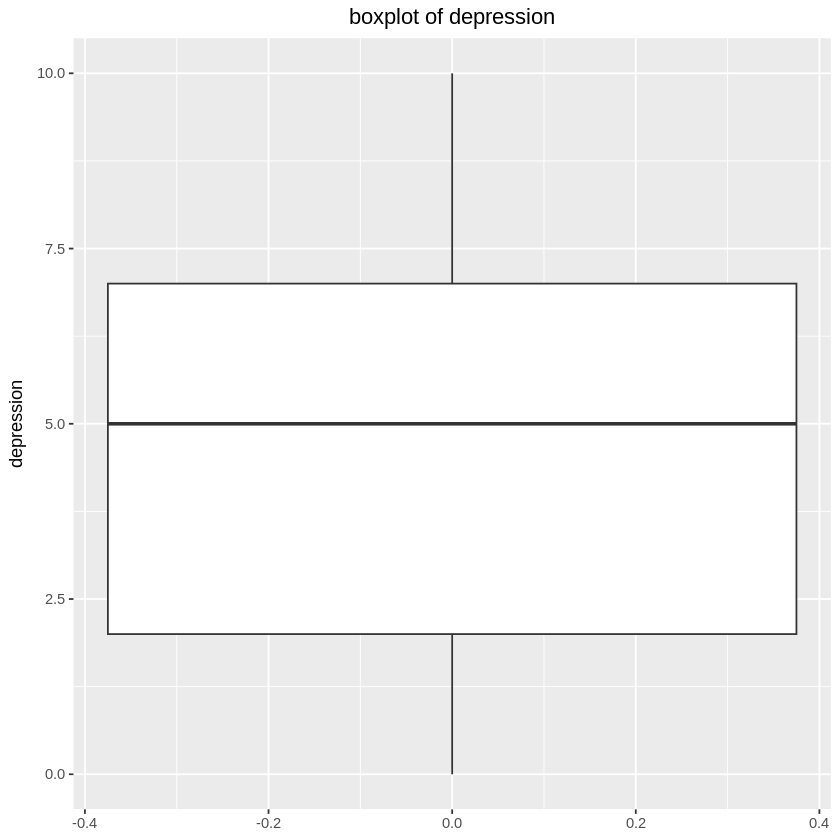

In [ ]:
for (i in list_1){
  x = ggplot(data4,aes(y=.data[[i]]))+geom_boxplot()+labs(title= paste("boxplot of", i)) +theme(plot.title = element_text(hjust = .5))
  print(x)
}

In [ ]:
for (i in list_1){
  x = shapiro.test(data4[[i]])
  print(x)
  print(i)
}


	Shapiro-Wilk normality test

data:  data4[[i]]
W = 0.86397, p-value = 0.0008455

[1] "hourslistened"

	Shapiro-Wilk normality test

data:  data4[[i]]
W = 0.9425, p-value = 0.08819

[1] "depression"


In [ ]:
cor.test(data4$hourslistened, data4$depression,method = 'k')

Warning message in cor.test.default(data4$hourslistened, data4$depression, method = "k"):
“Cannot compute exact p-value with ties”



	Kendall's rank correlation tau

data:  data4$hourslistened and data4$depression
z = 0.16593, p-value = 0.8682
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
0.02248009 


In [ ]:
method_list = list('s','k','p')

for (i in method_list){
  x = cor.test(data4$hourslistened,data4$depression,method=i)
  print(x)
}

Warning message in cor.test.default(data4$hourslistened, data4$depression, method = i):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  data4$hourslistened and data4$depression
S = 5107.7, p-value = 0.7285
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06383976 



Warning message in cor.test.default(data4$hourslistened, data4$depression, method = i):
“Cannot compute exact p-value with ties”



	Kendall's rank correlation tau

data:  data4$hourslistened and data4$depression
z = 0.16593, p-value = 0.8682
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
0.02248009 


	Pearson's product-moment correlation

data:  data4$hourslistened and data4$depression
t = 1.1254, df = 30, p-value = 0.2693
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1585532  0.5138964
sample estimates:
      cor 
0.2012682 



## Level 4: Visualization

• Graph the relationship between the number of hours someone listens to music and their OCD score

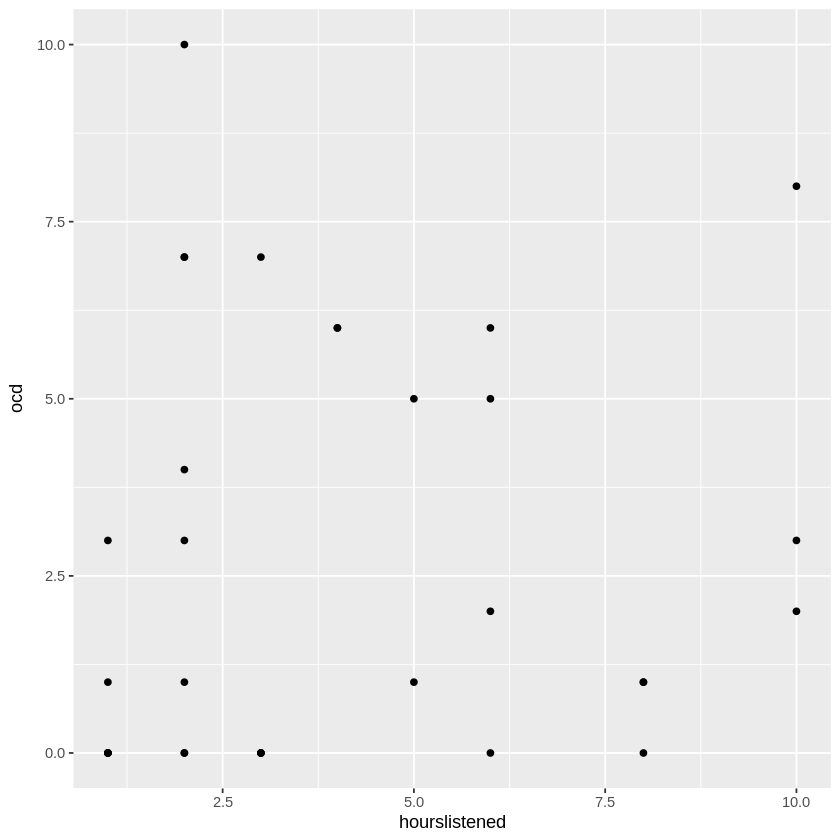

In [ ]:
data4 |> ggplot(aes(x=hourslistened,y=ocd))+geom_point()